In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv(r"C:\Users\lavis\Downloads\insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,cover,dependents,region,charges
0,54,female,47.410,2.0,yes,10000000.0,5.0,southeast,63770.42801
1,45,male,30.360,2.0,yes,20000000.0,5.0,southeast,62592.87309
2,52,male,34.485,3.0,yes,5000000.0,7.0,northwest,60021.39897
3,31,female,38.095,1.0,yes,1000000.0,4.0,northeast,58571.07448
4,33,female,35.530,2.0,yes,1000000.0,8.0,northwest,55135.40209


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1297 non-null   float64
 3   children    1269 non-null   float64
 4   smoker      1338 non-null   object 
 5   cover       926 non-null    float64
 6   dependents  1226 non-null   float64
 7   region      1338 non-null   object 
 8   charges     1338 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 94.2+ KB


In [5]:
data.describe()

,age,bmi,children,cover,dependents,charges
count,1338.000000,1297.000000,1269.000000,9.260000e+02,1226.000000,1338.000000
mean,39.153961,30.718855,1.156028,4.152700e+06,3.428222,13270.422265
std,14.042469,6.102233,1.199733,2.663091e+06,2.973925,12110.011237
min,18.000000,15.960000,0.000000,1.000000e+05,0.000000,1121.873900
25%,26.000000,26.315000,0.000000,2.000000e+06,1.000000,4740.287150
50%,39.000000,30.495000,1.000000,5.000000e+06,3.000000,9382.033000
75%,51.000000,34.700000,2.000000,5.500000e+06,5.000000,16639.912515
max,64.000000,53.130000,5.000000,2.000000e+07,10.000000,63770.428010


In [6]:
data.shape

(1338, 9)

In [7]:
#checking null values
data.isnull().sum()

age             0
sex             0
bmi            41
children       69
smoker          0
cover         412
dependents    112
region          0
charges         0
dtype: int64

In [8]:
#filling null values
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data['cover'] = data['cover'].fillna(data['cover'].mean())
data['children'] = data['children'].fillna(data['children'].median())
data['dependents'] = data['dependents'].fillna(data['dependents'].median())

In [9]:
#converting smoker column to numeric
data['smoker'] = data['smoker'].str.lower().map({'yes': 1, 'no': 0})

In [10]:
#converting region column to numeric
le = LabelEncoder()
data['region'] = le.fit_transform(data['region'])

In [11]:
#converting sex column to numeric
data['sex'] = data['sex'].str.lower().map({'female': 1, 'male': 0})

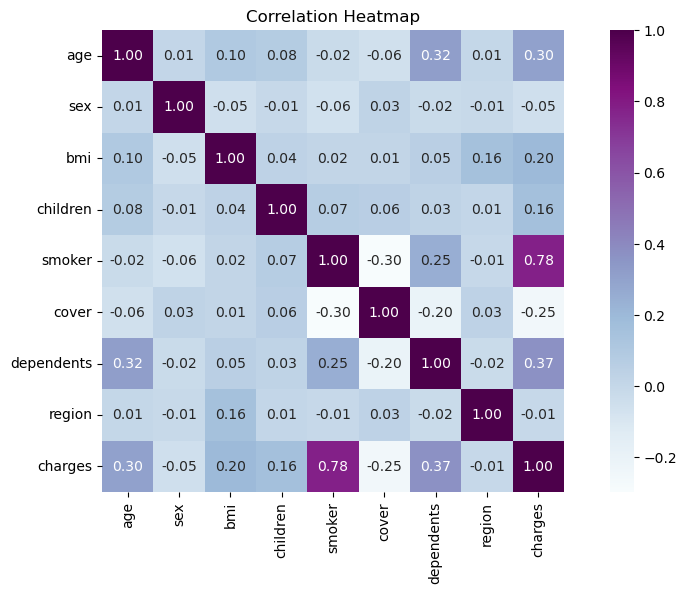

In [12]:
#checking correlation of features for deciding features
numeric_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 6))
corr = numeric_features.corr()
sns.heatmap(corr, annot=True, cmap='BuPu', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [13]:
#features and target
X = data[['age','bmi','smoker','children','dependents']]
y = data[['charges']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
#model fitting and validation - Decision Tree
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
mape_score = mean_absolute_percentage_error(y_test, predictions)
print("MAPE:",mape_score)
r2 = r2_score(y_test, predictions)
print("R2 Score:",r2)

MAPE: 0.23753541885294507
R2 Score: 0.8519434408360224


In [16]:
#model fitting and validation - Random Forest
rf = RandomForestRegressor(n_estimators=150, max_depth=5, min_samples_split=10, min_samples_leaf=3)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
mape_score = mean_absolute_percentage_error(y_test, predictions)
print("MAPE:",mape_score)
r2 = r2_score(y_test, predictions)
print("R2 Score:",r2)

C:\Users\lavis\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAPE: 0.20210024750793304
R2 Score: 0.8675867032628403


In [17]:
#comapring actual and predicted values
comparison_df = X_test.copy()
comparison_df["Actual charges"] = y_test
comparison_df["Predicted charges"] = predictions
comparison_df.head()

,age,bmi,smoker,children,dependents,Actual charges,Predicted charges
538,58,38.000,0,0.0,3.0,11365.95200,12942.147482
621,46,25.800,0,5.0,1.0,10096.97000,8852.309135
104,36,34.430,1,1.0,5.0,37742.57570,40659.918364
903,31,30.495,0,3.0,2.0,6113.23105,5096.768276
778,44,30.690,0,2.0,1.0,7731.42710,7986.071916


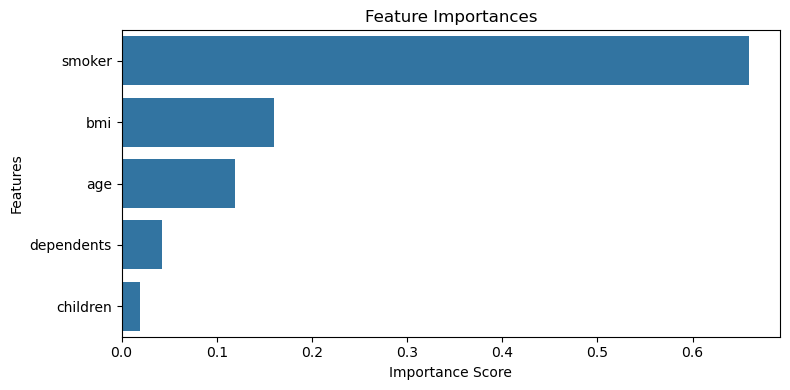

In [18]:
features = X
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=features.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

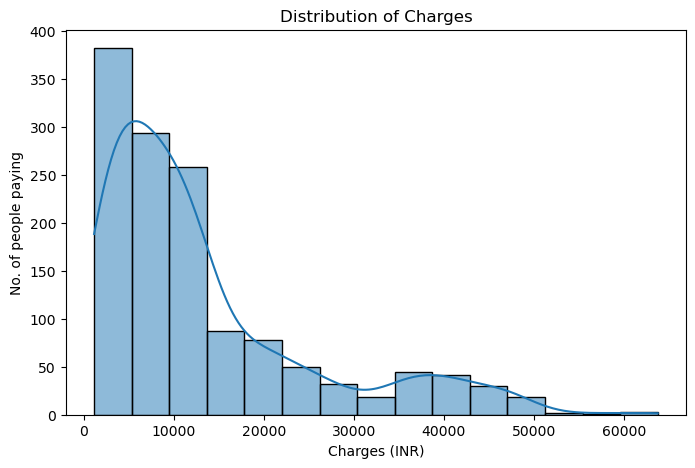

In [19]:
#price distribution
plt.figure(figsize=(8,5))
sns.histplot(data['charges'], kde=True, bins=15)
plt.title("Distribution of Charges")
plt.xlabel("Charges (INR)")
plt.ylabel("No. of people paying")
plt.show()

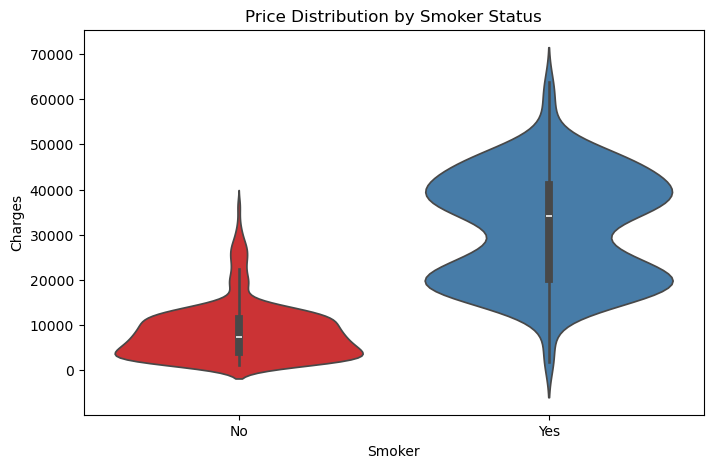

In [20]:
# smoker and charges comparison
plt.figure(figsize=(8,5))
sns.violinplot(x="smoker", y="charges", hue="smoker", legend=False, data=data, palette="Set1")
plt.xticks([0, 1], ["No", "Yes"])
plt.title("Price Distribution by Smoker Status")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

In [ ]:
#bmi vs charges
sns.histplot(data['charges'], kde=True, bins=15)
plt.title("Distribution of Charges")
plt.xlabel("Charges (INR)")
plt.ylabel("No. of people paying")
plt.show()